In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [56]:
boston.data.shape

(506, 13)

In [4]:
n = int(boston.data.shape[0] * 0.75)

In [8]:
X_train, X_test = boston.data[:n, :], boston.data[n:,:]
y_train, y_test = boston.target[:n], boston.target[n:]

In [17]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [13]:
import numpy as np

In [45]:
base_algorithms_list = [DecisionTreeRegressor(max_depth=5, random_state=42) for i in range(50)]
coefficients_list = [0.9 / (1.0 + i) for i in range(50)]
# coefficients_list = [0.9 for i in range(50)]`

In [46]:
base_algorithms_list[0].fit(X_train, y_train)
y_to_predict = y_train.copy()
for i in range(1, 50):
    y_to_predict = y_to_predict - base_algorithms_list[i - 1].predict(X_train) * coefficients_list[i - 1]
    base_algorithms_list[i].fit(X_train, y_to_predict)

In [47]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [48]:
np.power(mean_squared_error(y_test, gbm_predict(X_test)), 0.5)

4.807508103315044

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, grid_search
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [84]:
train_scores = []
test_scores = []
train_sizes = np.arange(10, 110, 10)
for n_estimators in train_sizes:
    clf = GradientBoostingRegressor(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

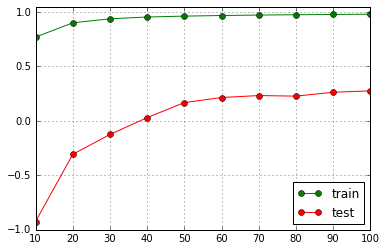

In [87]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores, 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores, 'r-', marker='o', label='test')
pylab.ylim((-1.0, 1.05))
pylab.legend(loc='lower right')

In [88]:
train_scores = []
test_scores = []
train_sizes = np.arange(1, 11)
for max_depth in train_sizes:
    clf = GradientBoostingRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

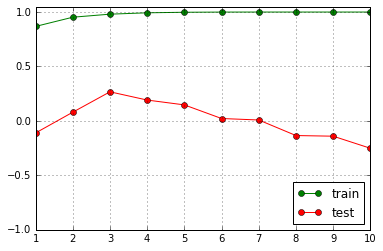

In [89]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores, 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores, 'r-', marker='o', label='test')
pylab.ylim((-1.0, 1.05))
pylab.legend(loc='lower right')

In [90]:
from sklearn.linear_model import LinearRegression
lnr_clf = LinearRegression()

In [91]:
lnr_clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
lnr_clf.score(X_test, y_test)
np.power(mean_squared_error(y_test, gbm_predict(X_test)), 0.5)

-1.362827634729058